# Week 2 - Lab

* The **Task** is to **fit** a polynomial curve to data. This is called **curve fitting**.
* The Learning Outcome: Hands-on application of Automatic Differentiation.


## Creating the data

* Let us first create some data using a known function. We will use the **sinusoidal** function $y=f(x)=sin(x)$. 
    * x is the input to the function and y is the output of the function.
* The following code generates and plots our data. 

In [1]:
import torch
import math
import matplotlib.pyplot as plt
%matplotlib inline

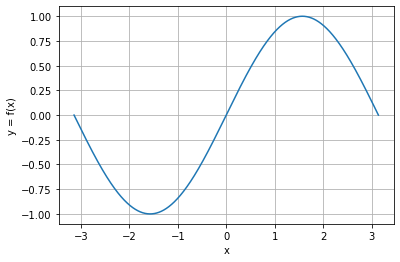

In [2]:
# Create input data x and output (target) data y
N = 2000 # number of samples
x = torch.linspace(-math.pi, math.pi, N, dtype=torch.float32)
y = torch.sin(x);
plt.plot(x, y);
plt.grid();
plt.xlabel('x');
plt.ylabel('y = f(x)');

## The Task

* Let's assume that we do not know the function that generated the target $y$ from input $x$. That is we do not know that $y$ and $x$ are related through the function $y=sin(x)$.
* We are just given the value pais $(x_i, y_i), i=1,\dots,N$.
* Our goal is find a polynomial curve that can fit the pais $(x_i, y_i)$ as accurately as possible.
* A polynomial (of degree 3) is given by the following formula:
$$P_3(x)= w_0 + w_1x + w_2x^2 + w_3x^3$$
where $w_0, w_1, w_2, w_3$ are the weights (our model parameters).
* By changing the weights different polynomial curves can be obtained!

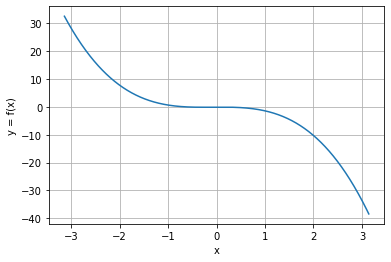

In [3]:
# Run this cell multiple times to see how different polynomial curves look like 

# Randomly initialize weights
w0 = torch.randn((), dtype=torch.float32)
w1 = torch.randn((), dtype=torch.float32)
w2 = torch.randn((), dtype=torch.float32)
w3 = torch.randn((), dtype=torch.float32)
y_hat = w0 + w1 * x + w2 * x ** 2 + w3 * x ** 3

# Plot the polynomial curve 
plt.plot(x, y_hat);
plt.grid();
plt.xlabel('x');
plt.ylabel('y = f(x)');

## The Algorithm  
* We want to find the weights so that the polynomial curve becomes "as close as possible" to the sinusodial function. 
* "As close as possible" is defined with the $L_2$ loss: $$\sum_{i=1}^N (\tilde{y}_i - y_i)^2$$ where $\tilde{y}_i =w_0 + w_1x_i + w_2x_i^2 + w_3x_i^3$

* To find the weights, you have to execute the following algorithm for 2000 iterations:
    1. Step 1: Calculate prediction $\tilde{y}_i, i=1,\dots,N$ with current weights (forward pass) 
    1. Step 2: Calculate the derivative of the loss with respect to $\tilde{y}_i$:

    $$\textrm {grad_} \tilde{y}_i= 2(\tilde{y}_i-y_i), i=1,\dots,N.$$
     
    1. Step 3: Calculate the derivative of the loss with respect to the weights. The derivatives are given by the following formulas:

    $$\textrm {grad_} w_0= \sum_{i=1}^N \textrm {grad_} \tilde{y}_i,$$

    $$\textrm {grad_} w_1= \sum_{i=1}^N \textrm {grad_} \tilde{y}_ix_i,$$
  
    $$\textrm {grad_} w_2= \sum_{i=1}^N \textrm {grad_} \tilde{y}_ix_i^2,$$

    $$\textrm {grad_} w_3= \sum_{i=1}^N \textrm {grad_} \tilde{y}_ix_i^3.$$

    1. Step 4: Update the weights from:

    $$ w_0 \leftarrow w_0 - lr \cdot \textrm {grad_} w_0,$$
    
    $$ w_1 \leftarrow w_1 - lr \cdot \textrm {grad_} w_1,$$

    $$ w_2 \leftarrow w_2 - lr \cdot \textrm {grad_} w_2,$$

    $$ w_3 \leftarrow w_3 - lr \cdot \textrm {grad_} w_3,$$
    
    where lr is a constant which is called learning_rate. We set it to $1e-6$.


In [4]:
# Randomly initialize weights
w0 = torch.randn((), dtype=torch.float32)
w1 = torch.randn((), dtype=torch.float32)
w2 = torch.randn((), dtype=torch.float32)
w3 = torch.randn((), dtype=torch.float32)

# Fill in the gaps denoned with ?? by writing your code
lr = 1e-6 # learning rate
for t in range(2000):
    # Step 1. Calculate prediction y with current weights (forward pass).
    y_hat = w0 + w1 * x + w2 * x ** 2 + w3 * x ** 3

    # Compute and print loss
    loss = (y_hat - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())
        
    # Step 2. Calculate the derivative of the loss with respect to y_hat.
    # Write your code here:
    # grad_y_hat = ??
    grad_y_hat = 2.0 * (y_hat - y)
    
    # Step 3. Calculate the derivative of the loss with respect to the weights.
    # Write your code here:
    # grad_w0 = ??
    # grad_w1 = ??
    # grad_w2 = ??
    # grad_w3 = ??
    
    grad_w0 = grad_y_hat.sum()
    grad_w1 = (grad_y_hat * x).sum()
    grad_w2 = (grad_y_hat * x ** 2).sum()
    grad_w3 = (grad_y_hat * x ** 3).sum()
    
    # Step 4. Update the weights (using gradient descent).
    # Write your code here:
    # w0 = ??
    # w1 = ??
    # w2 = ??
    # w3 = ??
    
    w0 -= lr * grad_w0
    w1 -= lr * grad_w1
    w2 -= lr * grad_w2
    w3 -= lr * grad_w3


print(f'Result: y = {w0.item()} + {w1.item()} x + {w2.item()} x^2 + {w3.item()} x^3')

99 92.45315551757812
199 66.20380401611328
299 48.23799514770508
399 35.927188873291016
499 27.48179817199707
599 21.681468963623047
699 17.693296432495117
799 14.948081016540527
899 13.056313514709473
999 11.751294136047363
1099 10.850055694580078
1199 10.227002143859863
1299 9.7958345413208
1399 9.497152328491211
1499 9.290050506591797
1599 9.146307945251465
1699 9.046452522277832
1799 8.977020263671875
1899 8.928699493408203
1999 8.895042419433594
Result: y = -0.008395267650485039 + 0.852979838848114 x + 0.0014483208069577813 x^2 + -0.09279541671276093 x^3


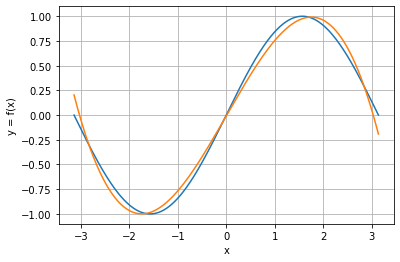

In [5]:
# Show predictions with final weights
y_hat = w0 + w1 * x + w2 * x ** 2 + w3 * x ** 3
plt.plot(x, y, x, y_hat);
plt.grid();
plt.xlabel('x');
plt.ylabel('y = f(x)');

## The Algorithm  using Automatic Differentiation
* In the previous algorithm we had to provide mathetimatical formulas for the derivatives of the loss with respect to $\tilde{y}_i$ and the weights.
* We also had to code the formulas.
* We can by-pass all of the above using PyTorch's Automatic Differentiation.
* Modify the previous algotithm as follows:
    1. Initialize the weights as above but also set `requires_grad=True`. This will indicate to PyTorch that it must calculate gradients for these variables. 
    1. Calculate the `loss` and call `loss.backward()`. 
    1. The calculcated gradients for each weight are stored in .grad (for example the $\textrm {grad_} w_0$ is stored in `w_0.grad`. Using the automatically calculated gradients update the weights as above.
    1. Set all the gradients for the weights to zero


In [6]:
# Modification 1: Initialize the weights as above but set requires_grad=True
# Write your code here:
# w0 = ??
# w1 = ??
# w2 = ??
# w3 = ??

w0 = torch.randn((), dtype=torch.float32, requires_grad=True)
w1 = torch.randn((), dtype=torch.float32, requires_grad=True)
w2 = torch.randn((), dtype=torch.float32, requires_grad=True)
w3 = torch.randn((), dtype=torch.float32, requires_grad=True)

# Fill in the gaps denoned with ?? by writing your code
lr = 1e-6 # learning rate
for t in range(2000):
    # Calculate prediction y with current weights (forward pass).
    y_hat = w0 + w1 * x + w2 * x ** 2 + w3 * x ** 3

    # Compute and print loss
    loss = (y_hat - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())
   
    # Modification 2: call backward() on loss
    # Write your code here:
    # ??
    loss.backward()
    
    # The update of the weights should not create new gradients
    # For this reason we need to use torch.no_grad()
    with torch.no_grad():
        # Modification 3: Using the automatically calculated gradients update the weights as above.
        # Write your code here:
        # w0 -= ??
        # w1 -= ??
        # w2 -= ??
        # w3 -= ??
        w0 -= lr * w0.grad
        w1 -= lr * w1.grad
        w2 -= lr * w2.grad
        w3 -= lr * w3.grad

    # Modification 4: set all the gradients for the weights to zero
    # Write your code here:
    # ??
    # w0.grad = ??
    # w1.grad = ??
    # w2.grad = ??
    # w3.grad = ??
    
    w0.grad.zero_()
    w1.grad.zero_()
    w2.grad.zero_()
    w3.grad.zero_()

print(f'Result: y = {w0.item()} + {w1.item()} x + {w2.item()} x^2 + {w3.item()} x^3')

99 108.98374938964844
199 79.69132232666016
299 58.96553039550781
399 44.300907135009766
499 33.92477035522461
599 26.58293914794922
699 21.388044357299805
799 17.712247848510742
899 15.111307144165039
999 13.270915031433105
1099 11.968667984008789
1199 11.047195434570312
1299 10.395161628723145
1399 9.93377685546875
1499 9.6072998046875
1599 9.37628173828125
1699 9.212808609008789
1799 9.097131729125977
1899 9.015279769897461
1999 8.957356452941895
Result: y = 0.012529239989817142 + 0.8564725518226624 x + -0.002161499811336398 x^2 + -0.0932922288775444 x^3


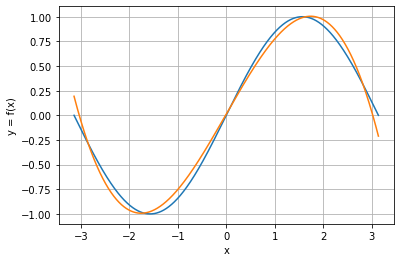

In [7]:
# Show predictions with final weights
w0.detach_().numpy()
w1.detach_().numpy()
w2.detach_().numpy()
w3.detach_().numpy()

y_hat = w0 + w1 * x + w2 * x ** 2 + w3 * x ** 3
plt.plot(x, y, x, y_hat);
plt.grid();
plt.xlabel('x');
plt.ylabel('y = f(x)');